# Pokemon classification
The purpose of this project is to try and identify if a pokemon is legendary, mythical. I will look at maybe including sub legendary however I dont know what pokemon are classed as this. The dataset is https://www.kaggle.com/mariotormo/complete-pokemon-dataset-updated-090420

## Data Prepossing and cleaning
First I need to only select the interesting coloumns that I think may be good for predicting if the pokemon is legendary. I will then check the data types, missing values and combine the columns is_sub_legendary, is_legendary and is_mythical.

In [8]:
import pandas as pd

poke = pd.read_csv('pokedex_(Update.04.20).csv')
poke.columns

Index(['Unnamed: 0', 'pokedex_number', 'name', 'german_name', 'japanese_name',
       'generation', 'is_sub_legendary', 'is_legendary', 'is_mythical',
       'species', 'type_number', 'type_1', 'type_2', 'height_m', 'weight_kg',
       'abilities_number', 'ability_1', 'ability_2', 'ability_hidden',
       'total_points', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense',
       'speed', 'catch_rate', 'base_friendship', 'base_experience',
       'growth_rate', 'egg_type_number', 'egg_type_1', 'egg_type_2',
       'percentage_male', 'egg_cycles', 'against_normal', 'against_fire',
       'against_water', 'against_electric', 'against_grass', 'against_ice',
       'against_fight', 'against_poison', 'against_ground', 'against_flying',
       'against_psychic', 'against_bug', 'against_rock', 'against_ghost',
       'against_dragon', 'against_dark', 'against_steel', 'against_fairy'],
      dtype='object')

In [9]:
poke=poke.drop(['Unnamed: 0','species', 'type_number', 'type_1', 'type_2','abilities_number', 'ability_1', 'ability_2', 'ability_hidden',
       'total_points', 'catch_rate', 'base_friendship', 'base_experience',
       'growth_rate', 'egg_type_number', 'egg_type_1', 'egg_type_2',
       'percentage_male', 'egg_cycles', 'against_normal', 'against_fire',
       'against_water', 'against_electric', 'against_grass', 'against_ice',
       'against_fight', 'against_poison', 'against_ground', 'against_flying',
       'against_psychic', 'against_bug', 'against_rock', 'against_ghost',
       'against_dragon', 'against_dark', 'against_steel', 'against_fairy','german_name','japanese_name'],axis=1)

In [10]:
poke.head()

,pokedex_number,name,generation,is_sub_legendary,is_legendary,is_mythical,height_m,weight_kg,hp,attack,defense,sp_attack,sp_defense,speed
0,1,Bulbasaur,1,0,0,0,0.7,6.9,45.0,49.0,49.0,65.0,65.0,45.0
1,2,Ivysaur,1,0,0,0,1.0,13.0,60.0,62.0,63.0,80.0,80.0,60.0
2,3,Venusaur,1,0,0,0,2.0,100.0,80.0,82.0,83.0,100.0,100.0,80.0
3,3,Mega Venusaur,1,0,0,0,2.4,155.5,80.0,100.0,123.0,122.0,120.0,80.0
4,4,Charmander,1,0,0,0,0.6,8.5,39.0,52.0,43.0,60.0,50.0,65.0


In [11]:
poke.dtypes

pokedex_number        int64
name                 object
generation            int64
is_sub_legendary      int64
is_legendary          int64
is_mythical           int64
height_m            float64
weight_kg           float64
hp                  float64
attack              float64
defense             float64
sp_attack           float64
sp_defense          float64
speed               float64
dtype: object

In [12]:
poke.isna().sum()

pokedex_number      0
name                0
generation          0
is_sub_legendary    0
is_legendary        0
is_mythical         0
height_m            1
weight_kg           2
hp                  1
attack              1
defense             1
sp_attack           1
sp_defense          1
speed               1
dtype: int64

In [16]:
poke=poke.dropna()
poke.isna().sum()

pokedex_number      0
name                0
generation          0
is_sub_legendary    0
is_legendary        0
is_mythical         0
height_m            0
weight_kg           0
hp                  0
attack              0
defense             0
sp_attack           0
sp_defense          0
speed               0
dtype: int64

In [23]:
poke.loc[poke['is_sub_legendary'] == 1, 'legendary'] = 1
poke.loc[poke['is_legendary'] == 1, 'legendary'] = 1
poke.loc[poke['is_mythical'] == 1, 'legendary'] = 1
poke['legendary']=poke['legendary'].fillna(0)
poke['legendary']=poke['legendary'].astype('int16')

In [24]:
poke.head()

,pokedex_number,name,generation,is_sub_legendary,is_legendary,is_mythical,height_m,weight_kg,hp,attack,defense,sp_attack,sp_defense,speed,legendary
0,1,Bulbasaur,1,0,0,0,0.7,6.9,45.0,49.0,49.0,65.0,65.0,45.0,0
1,2,Ivysaur,1,0,0,0,1.0,13.0,60.0,62.0,63.0,80.0,80.0,60.0,0
2,3,Venusaur,1,0,0,0,2.0,100.0,80.0,82.0,83.0,100.0,100.0,80.0,0
3,3,Mega Venusaur,1,0,0,0,2.4,155.5,80.0,100.0,123.0,122.0,120.0,80.0,0
4,4,Charmander,1,0,0,0,0.6,8.5,39.0,52.0,43.0,60.0,50.0,65.0,0


## Exploratory Data Analysis 
Some knowledge of what pokemon are legendary and there states are useful, it will also be good the know what properties correlate well with legendary pokemon.

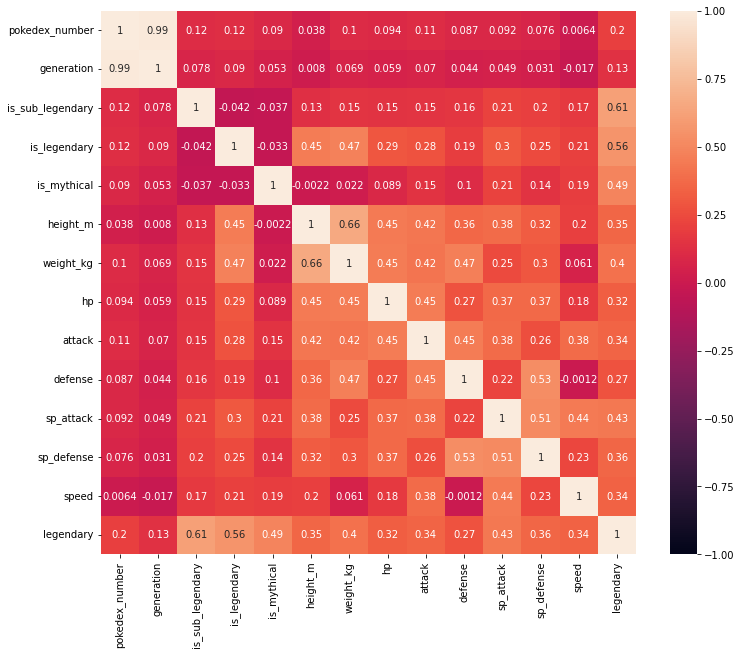

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
heatmap = sns.heatmap(poke.corr(), vmin=-1, vmax=1, annot=True)

This shows that almost all properties have a correlation with the legendary varible. It will also be useful to see them plotted.

In [45]:
poke['legendary'].sum()/poke['legendary'].count()

0.10916179337231968

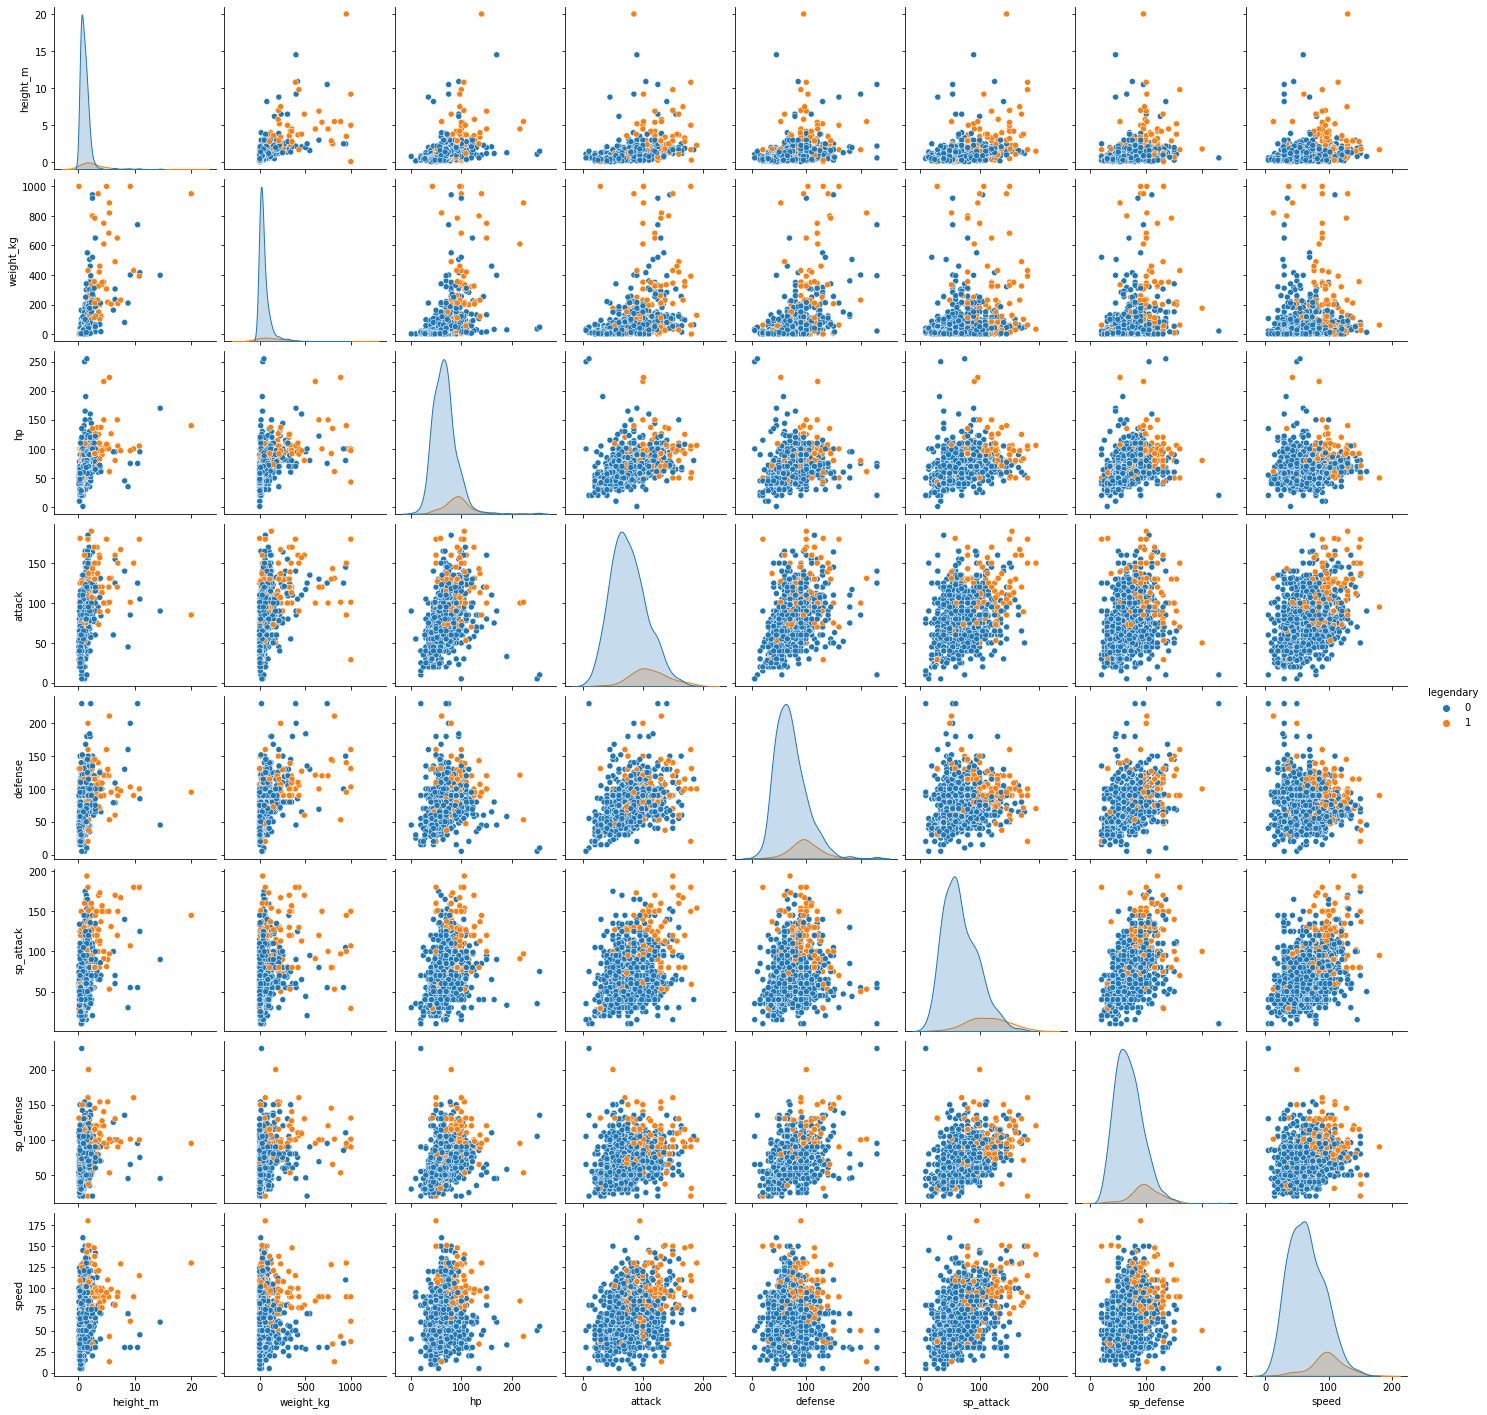

In [32]:
sns.pairplot(poke, hue="legendary",vars=['height_m','weight_kg','hp','attack','defense','sp_attack','sp_defense','speed'])

We can see that there does tend to be a trend for higher values on legendary pokemon but its not huge, we could always find the mean to quantify this.

## Machine Learning
Due to us having not a huge amount of data and its being numeric we will use a linear SVC, KNeighbours, Random forest and then try ensemble classifiers.

In [34]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

train_set, test_set = train_test_split(poke,test_size=0.2)
train_y=train_set["legendary"]
train_x=train_set.drop(["legendary",'pokedex_number','name','generation','is_sub_legendary','is_legendary','is_mythical'], axis=1)
test_y=test_set["legendary"]
test_x=test_set.drop(["legendary",'pokedex_number','name','generation','is_sub_legendary','is_legendary','is_mythical'], axis=1)

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

train_x = num_pipeline.fit_transform(train_x)
test_x = num_pipeline.fit_transform(test_x)

In [52]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import PrecisionRecallDisplay, ConfusionMatrixDisplay, RocCurveDisplay

model_scores=[]
models=['Random forst','kNN','SVC','XGBoost']

def eval(model,plots=True):
    ymul=model.predict(test_x)
    print("Model score: %.4f" % model.score(test_x,test_y))  
    print("The cross val score with 3 folds: ", cross_val_score(model, train_x, train_y, cv=3, scoring="accuracy"))
    print("F1-score: %.4f" % f1_score(test_y , ymul) )
    if(plots):
        dis = ConfusionMatrixDisplay.from_estimator(model,test_x, test_y)
        fig, ax = plt.subplots(figsize=(6, 6))
        PrecisionRecallDisplay.from_estimator(model, test_x, test_y,ax=ax)
        ax.set_title("2-class Precision-Recall curve")
        dis1 = RocCurveDisplay.from_estimator(model, test_x, test_y)
    return model.score(test_x,test_y)

Model score: 0.9466
The cross val score with 3 folds:  [0.9270073  0.93040293 0.93406593]
F1-score: 0.7442


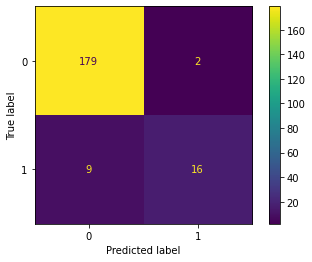

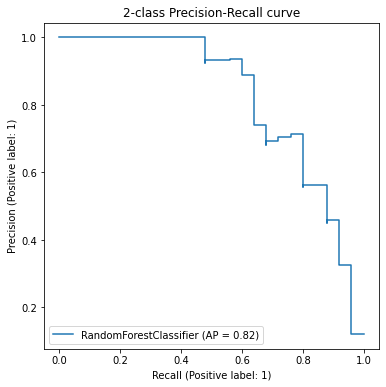

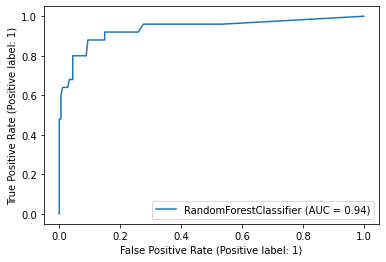

In [53]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_clf.fit(train_x,train_y)
model_scores.append(eval(forest_clf))

Model score: 0.9417
The cross val score with 3 folds:  [0.9379562  0.93406593 0.93040293]
F1-score: 0.7143


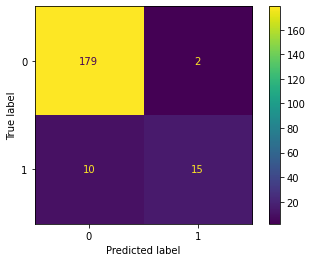

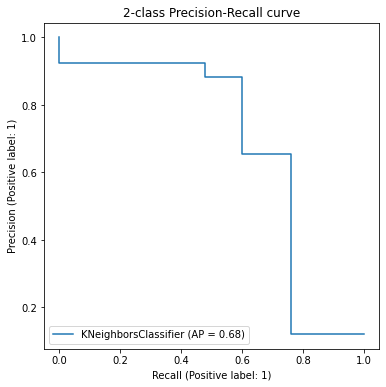

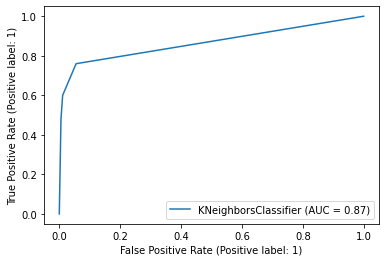

In [54]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors = 3)
neigh.fit(train_x,train_y)
model_scores.append(eval(neigh))

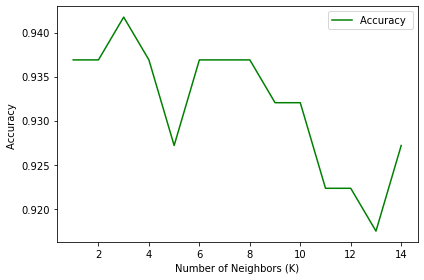

In [55]:
Ks = 15
mean_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(train_x,train_y)
    yhat=neigh.predict(test_x)
    mean_acc[n-1] = neigh.score(test_x,test_y)

plt.plot(range(1,Ks),mean_acc,'g')
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

Model score: 0.9223
The cross val score with 3 folds:  [0.91970803 0.91575092 0.93406593]
F1-score: 0.5789


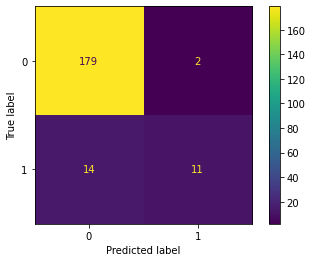

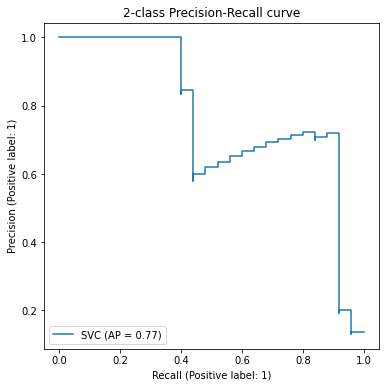

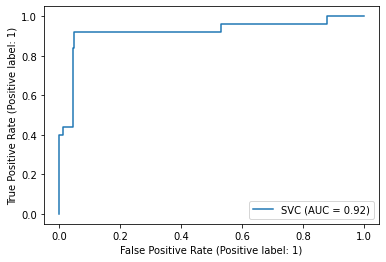

In [56]:
from sklearn.svm import SVC

svc_lin=SVC(kernel="linear", C=0.025)
svc_lin.fit(train_x,train_y)
model_scores.append(eval(svc_lin))

[19:30:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model score: 0.9369
[19:30:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:30:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:30:19] WARNING: C:/Users/Administrator/workspa

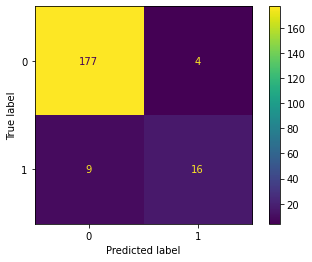

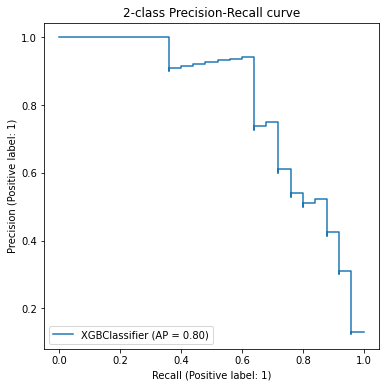

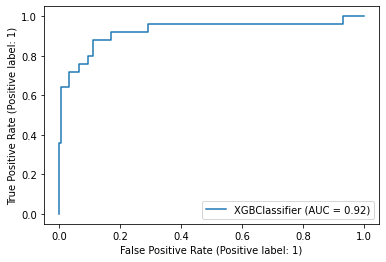

In [57]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False)
xgb.fit(train_x, train_y)
model_scores.append(eval(xgb))

## After Training

In [58]:
for i in range(len(models)):
    print(f'The model {models[i]} has a score {model_scores[i]}')

The model Random forst has a score 0.9466019417475728
The model kNN has a score 0.941747572815534
The model SVC has a score 0.9223300970873787
The model XGBoost has a score 0.9368932038834952


These are very good scores, however it may be because there are 10% of all pokemon that are legendary. I will try a votting classifier to see if it gets better anyway.

In [62]:
from sklearn.ensemble import VotingClassifier

eclf = VotingClassifier( estimators=[('xgb',xgb),('gnb', forest_clf),('Knn',neigh),('svm',svc_lin)],voting='hard')
eclf.fit(train_x, train_y)
eval(eclf,False)

[19:35:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model score: 0.9417
[19:35:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:35:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:35:02] WARNING: C:/Users/Administrator/workspa

0.941747572815534

This shows that it doesnt paticularly import anymore from before